In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from skimage.io import imread
import cv2 

Found 58422 images.


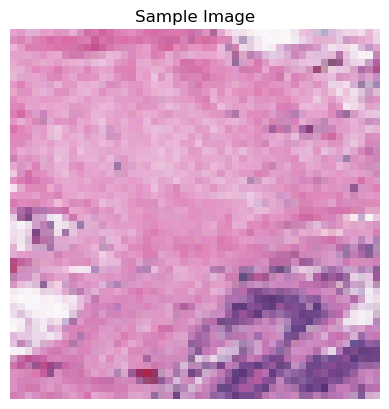

In [10]:
import os
import glob
from PIL import Image
import matplotlib.pyplot as plt

# Set the path to your local dataset directory (change this to the actual path on your machine)
image_directory = r'C:\Users\KIIT\Downloads\code\dataset'

# Check if the directory exists and list all PNG files
if os.path.exists(image_directory):
    images = glob.glob(os.path.join(image_directory, '**', '*.png'), recursive=True)
    if images:
        print(f"Found {len(images)} images.")
        
        # Display a sample image
        sample_image = Image.open(images[0])
        plt.imshow(sample_image)
        plt.title("Sample Image")
        plt.axis('off')
        plt.show()
    else:
        print("No images found in the specified directory.")
else:
    print(f"The directory {image_directory} does not exist.")


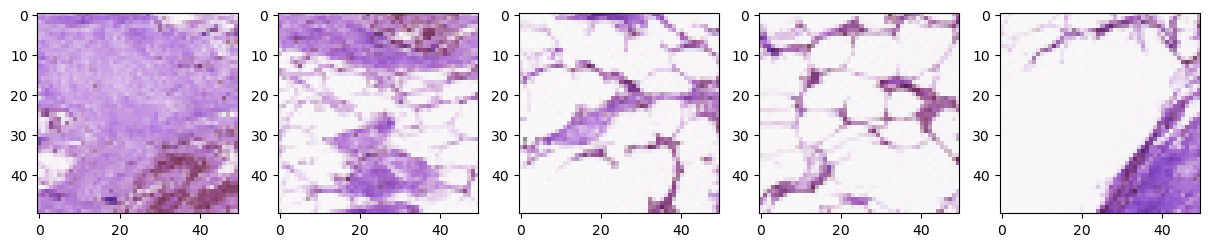

In [11]:
fig, axes = plt.subplots(1, 5, figsize=(15, 5))  
for i in range(5):
    img = cv2.imread(images[i])
    axes[i].imshow(img)   

In [12]:
df = pd.DataFrame(index=np.arange(0, len(images)), columns=["path", "target"])
for i in range(len(images)):
    df.loc[i, "path"] = images[i]
    df.loc[i, "target"] = int(images[i][-5])

In [13]:
df

,path,target
0,C:\Users\KIIT\Downloads\code\dataset\10253\0\1...,0
1,C:\Users\KIIT\Downloads\code\dataset\10253\0\1...,0
2,C:\Users\KIIT\Downloads\code\dataset\10253\0\1...,0
3,C:\Users\KIIT\Downloads\code\dataset\10253\0\1...,0
4,C:\Users\KIIT\Downloads\code\dataset\10253\0\1...,0
...,...,...
58417,C:\Users\KIIT\Downloads\code\dataset\12751\0\1...,0
58418,C:\Users\KIIT\Downloads\code\dataset\12751\0\1...,0
58419,C:\Users\KIIT\Downloads\code\dataset\12751\0\1...,0
58420,C:\Users\KIIT\Downloads\code\dataset\12751\0\1...,0


In [14]:
pos = df[df.target==1]
neg = df[df.target==0]

In [15]:
pos.shape

(14555, 2)

In [16]:
neg.shape

(43867, 2)

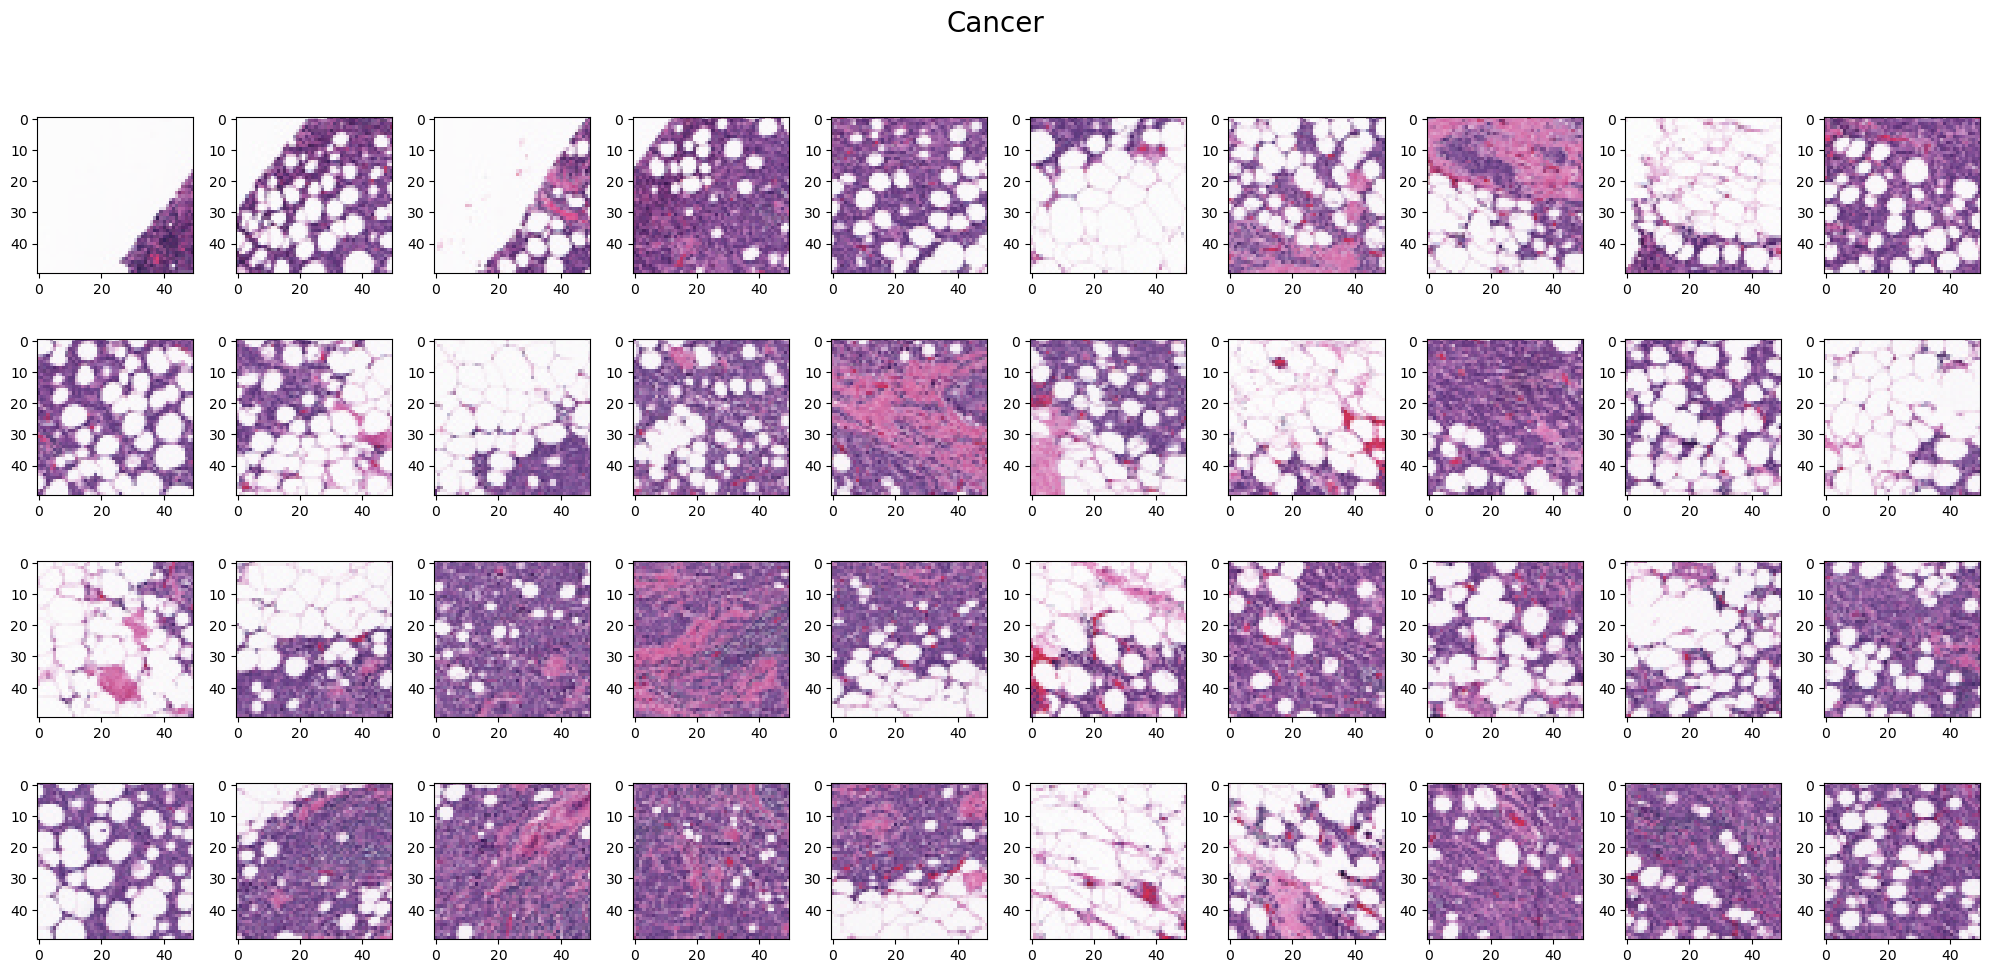

In [17]:
fig, axes = plt.subplots(4, 10, figsize=(20,10))
fig.suptitle('Cancer', fontsize=20)
for i in range(4):
    for j in range(10):        
        image = imread(pos.iloc[j + 10*i]["path"])
        axes[i,j].imshow(image)
plt.tight_layout(rect=[0, 0, 1, 0.96])

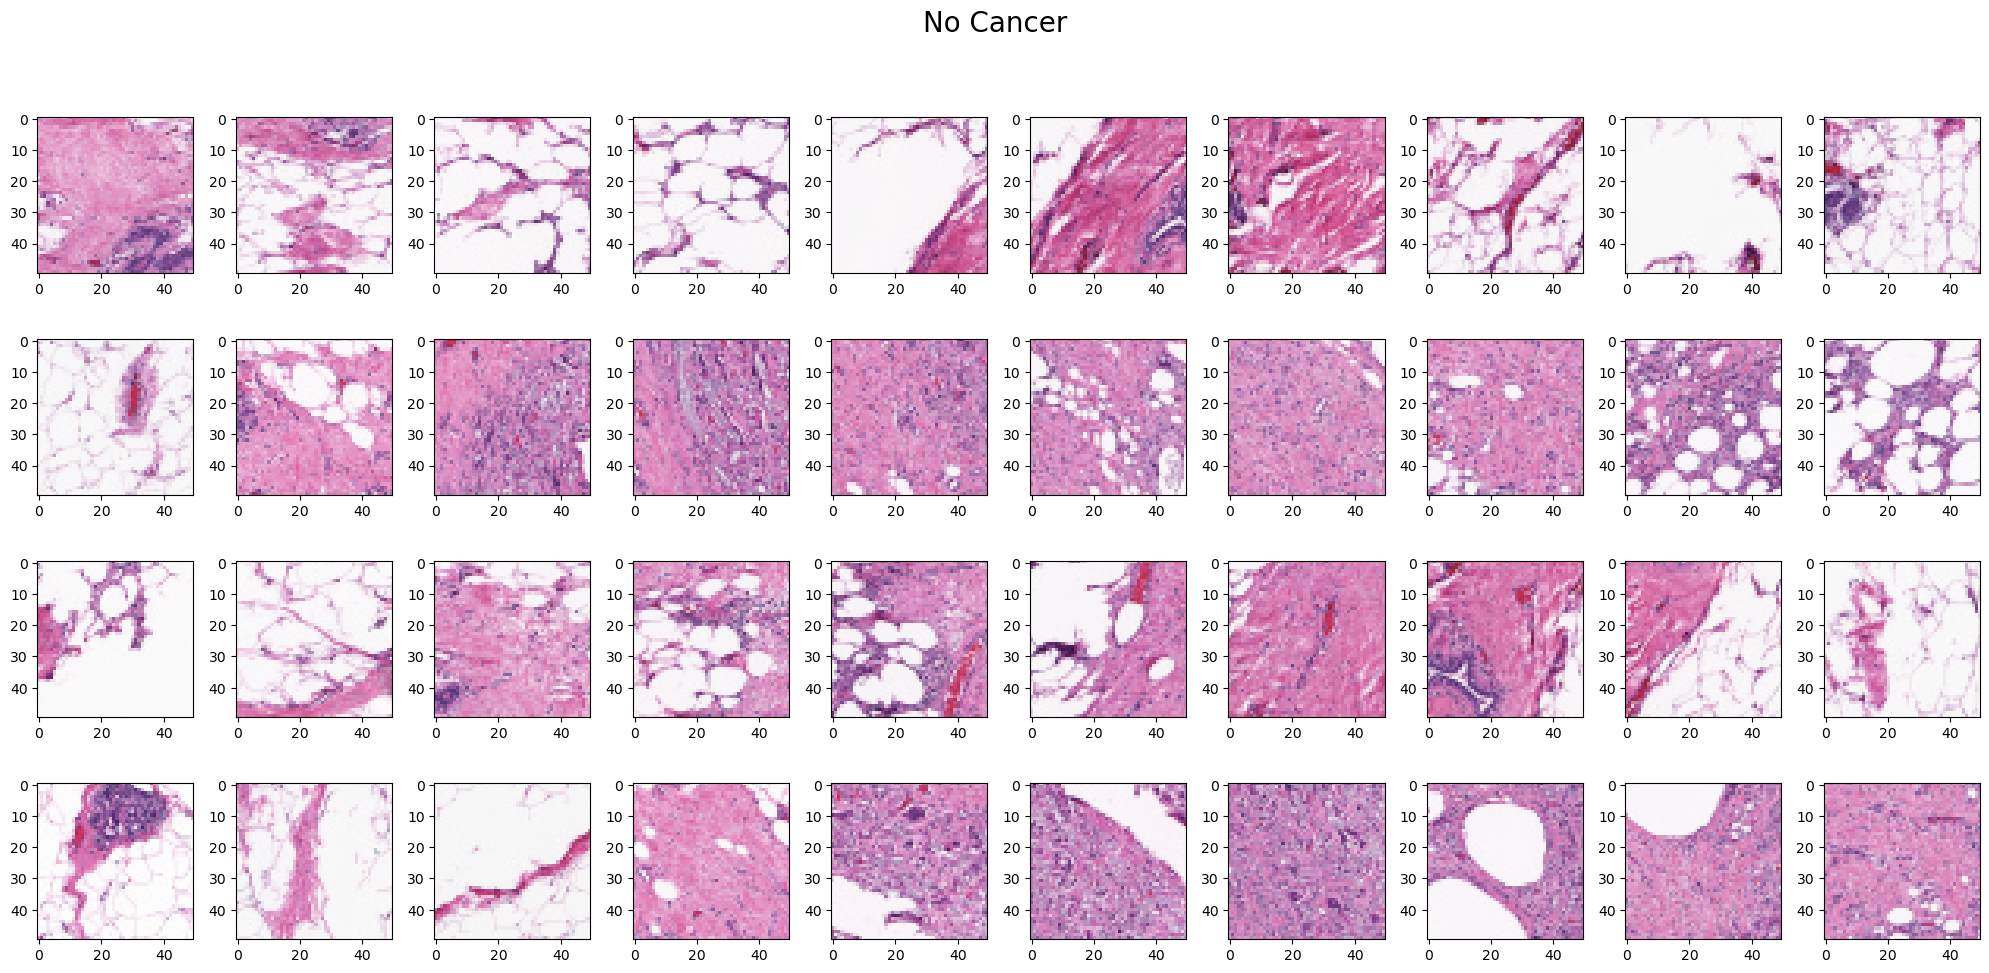

In [18]:
fig, axes = plt.subplots(4, 10, figsize=(20,10))
fig.suptitle('No Cancer', fontsize=20)
for i in range(4):
    for j in range(10):        
        image = imread(neg.iloc[j + 10*i]["path"])
        axes[i,j].imshow(image)
plt.tight_layout(rect=[0, 0, 1, 0.96])

C:\Users\KIIT\AppData\Local\Temp\ipykernel_27888\2815619972.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=df['target'].value_counts().index, y = df['target'].value_counts(), palette='Set1')


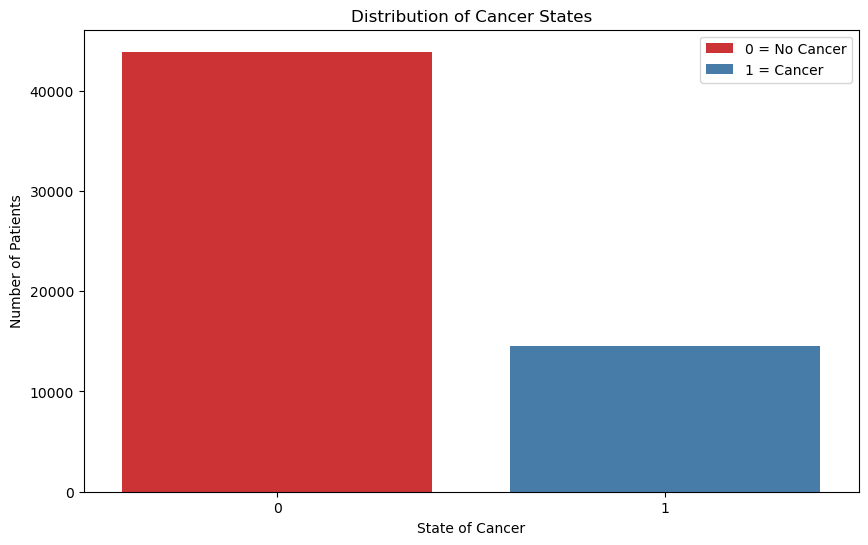

In [19]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=df['target'].value_counts().index, y = df['target'].value_counts(), palette='Set1')
plt.xlabel('State of Cancer')
plt.ylabel('Number of Patients')
plt.title('Distribution of Cancer States')
plt.legend(handles=ax.patches[:2], labels=['0 = No Cancer', '1 = Cancer'], loc='upper right')
plt.show()

In [20]:
from sklearn.utils import resample
pos_balanced = resample(pos,replace=True, n_samples=135000)  

In [21]:
df_balanced = pd.concat([neg, pos_balanced])

In [22]:
df_balanced.to_csv('balanced_dataframe.csv', index=False)

In [23]:
df_balanced

,path,target
0,C:\Users\KIIT\Downloads\code\dataset\10253\0\1...,0
1,C:\Users\KIIT\Downloads\code\dataset\10253\0\1...,0
2,C:\Users\KIIT\Downloads\code\dataset\10253\0\1...,0
3,C:\Users\KIIT\Downloads\code\dataset\10253\0\1...,0
4,C:\Users\KIIT\Downloads\code\dataset\10253\0\1...,0
...,...,...
42392,C:\Users\KIIT\Downloads\code\dataset\10302\1\1...,1
9601,C:\Users\KIIT\Downloads\code\dataset\10264\1\1...,1
54135,C:\Users\KIIT\Downloads\code\dataset\12626\1\1...,1
8008,C:\Users\KIIT\Downloads\code\dataset\10262\1\1...,1


In [24]:
values = df_balanced.values
np.random.shuffle(values)

In [25]:
X = []
y = []
for feature, label in values:
    image = cv2.imread(feature, cv2.IMREAD_GRAYSCALE)
    image = cv2.resize(image, (50, 50), interpolation = cv2.INTER_LINEAR)
    X.append(image)
    y.append(label)
X = np.array(X)
y = np.array(y)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [27]:
print(f'Length of Training Data: {len(X_train)}')
print(f'Length of Testing Data: {len(X_test)}')

Length of Training Data: 143093
Length of Testing Data: 35774


In [28]:
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import confusion_matrix
import itertools
from tensorflow.keras.utils import to_categorical

In [29]:
y_train = to_categorical(y_train, num_classes = 2)
y_test = to_categorical(y_test, num_classes = 2)

In [30]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, mode='min', verbose=1)
lr_reduction = ReduceLROnPlateau(monitor='val_loss', patience=3, verbose=1, factor=0.5, min_lr=0.0001)
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(50, 50, 1)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

c:\Users\KIIT\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 50, 50, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 50, 50, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 25, 25, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 25, 25, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 25, 25, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 12, 12, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,519,298 (9.61 MB)

 Trainable params: 2,518,850 (9.61 MB)

 Non-trainable params: 448 (1.75 KB)

In [32]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test), batch_size=64, callbacks=[early_stopping, lr_reduction])

Epoch 1/30
2236/2236 ━━━━━━━━━━━━━━━━━━━━ 382s 168ms/step - accuracy: 0.7873 - loss: 0.5733 - val_accuracy: 0.8476 - val_loss: 0.3589 - learning_rate: 0.0010
Epoch 2/30
2236/2236 ━━━━━━━━━━━━━━━━━━━━ 377s 169ms/step - accuracy: 0.8478 - loss: 0.3705 - val_accuracy: 0.8471 - val_loss: 0.3705 - learning_rate: 0.0010
Epoch 3/30
2236/2236 ━━━━━━━━━━━━━━━━━━━━ 375s 168ms/step - accuracy: 0.8799 - loss: 0.3097 - val_accuracy: 0.8996 - val_loss: 0.2836 - learning_rate: 0.0010
Epoch 4/30
2236/2236 ━━━━━━━━━━━━━━━━━━━━ 377s 169ms/step - accuracy: 0.9179 - loss: 0.2323 - val_accuracy: 0.9284 - val_loss: 0.2219 - learning_rate: 0.0010
Epoch 5/30
2236/2236 ━━━━━━━━━━━━━━━━━━━━ 376s 168ms/step - accuracy: 0.9415 - loss: 0.1757 - val_accuracy: 0.9301 - val_loss: 0.2223 - learning_rate: 0.0010
Epoch 6/30
2236/2236 ━━━━━━━━━━━━━━━━━━━━ 378s 169ms/step - accuracy: 0.9536 - loss: 0.1401 - val_accuracy: 0.9445 - val_loss: 0.1907 - learning_rate: 0.0010
Epoch 7/30
2236/2236 ━━━━━━━━━━━━━━━━━━━━ 375s 168ms

In [33]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)
print("Loss:", loss)

1118/1118 ━━━━━━━━━━━━━━━━━━━━ 22s 19ms/step - accuracy: 0.9699 - loss: 0.2864
Test Accuracy: 0.9694470763206482
Loss: 0.3020310699939728


In [34]:
y_pred = model.predict(X_test)
y_test = np.argmax(y_test, axis=1)
y_pred_classes = np.argmax(y_pred, axis=1)
print(classification_report(y_test, y_pred_classes))

1118/1118 ━━━━━━━━━━━━━━━━━━━━ 21s 19ms/step
              precision    recall  f1-score   support

           0       1.00      0.88      0.93      8729
           1       0.96      1.00      0.98     27045

    accuracy                           0.97     35774
   macro avg       0.98      0.94      0.96     35774
weighted avg       0.97      0.97      0.97     35774



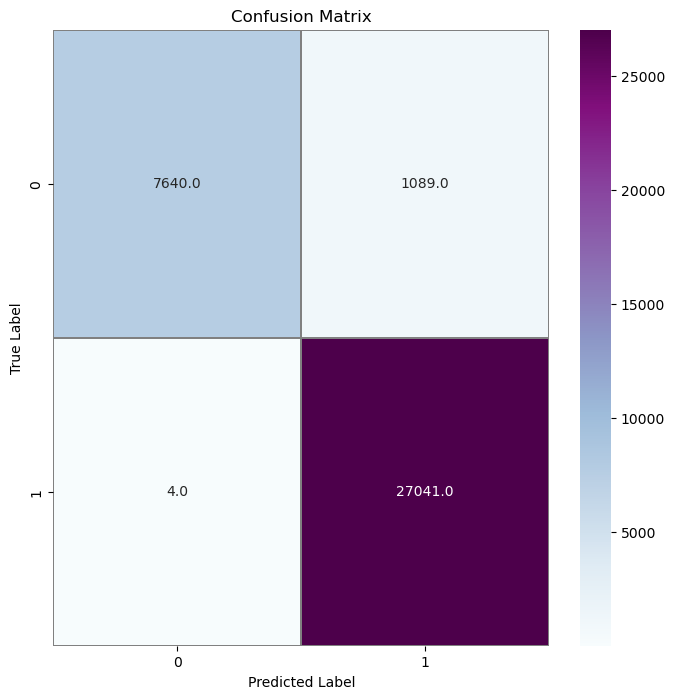

In [35]:
confusion_mtx = confusion_matrix(y_test, y_pred_classes) 
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="BuPu",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

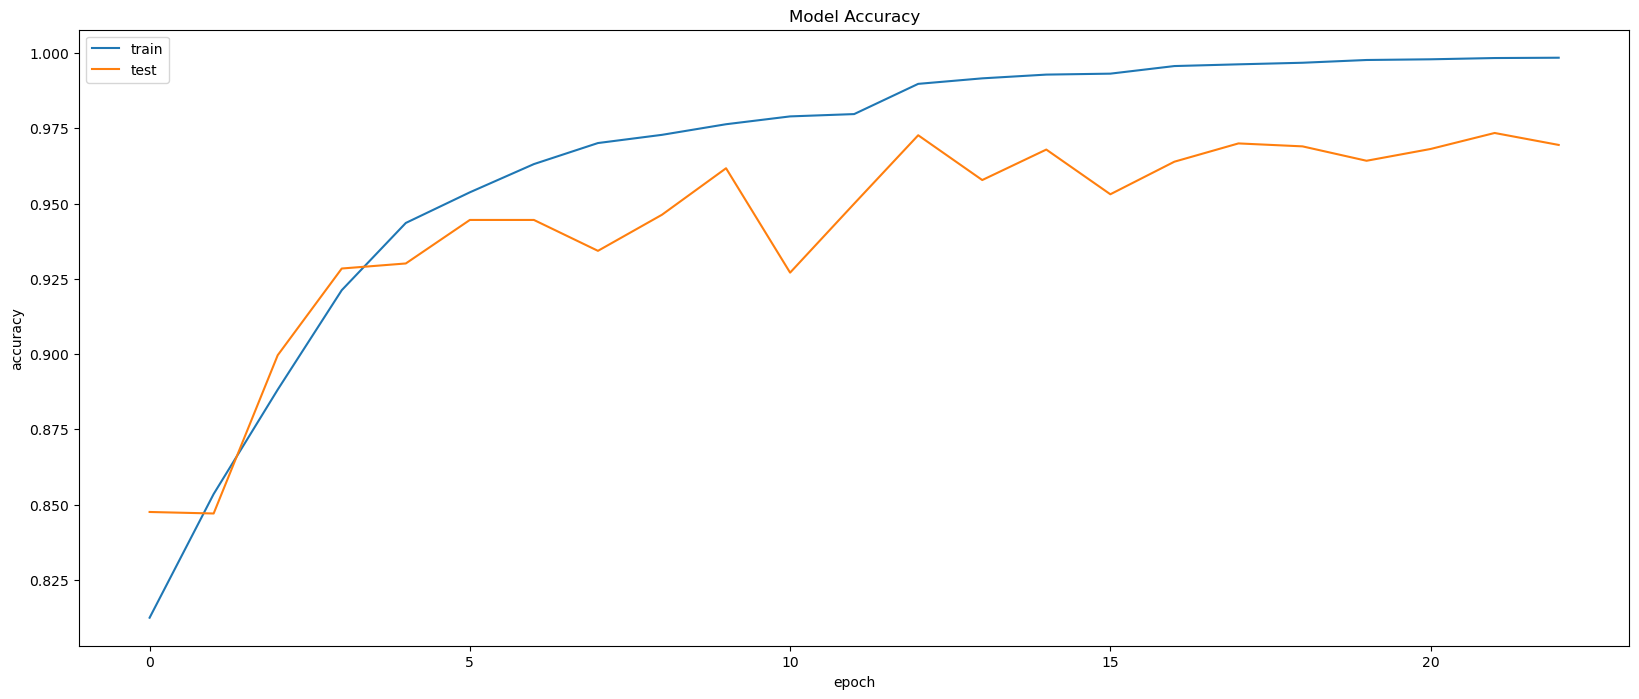

In [36]:
plt.figure(figsize=(20, 8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

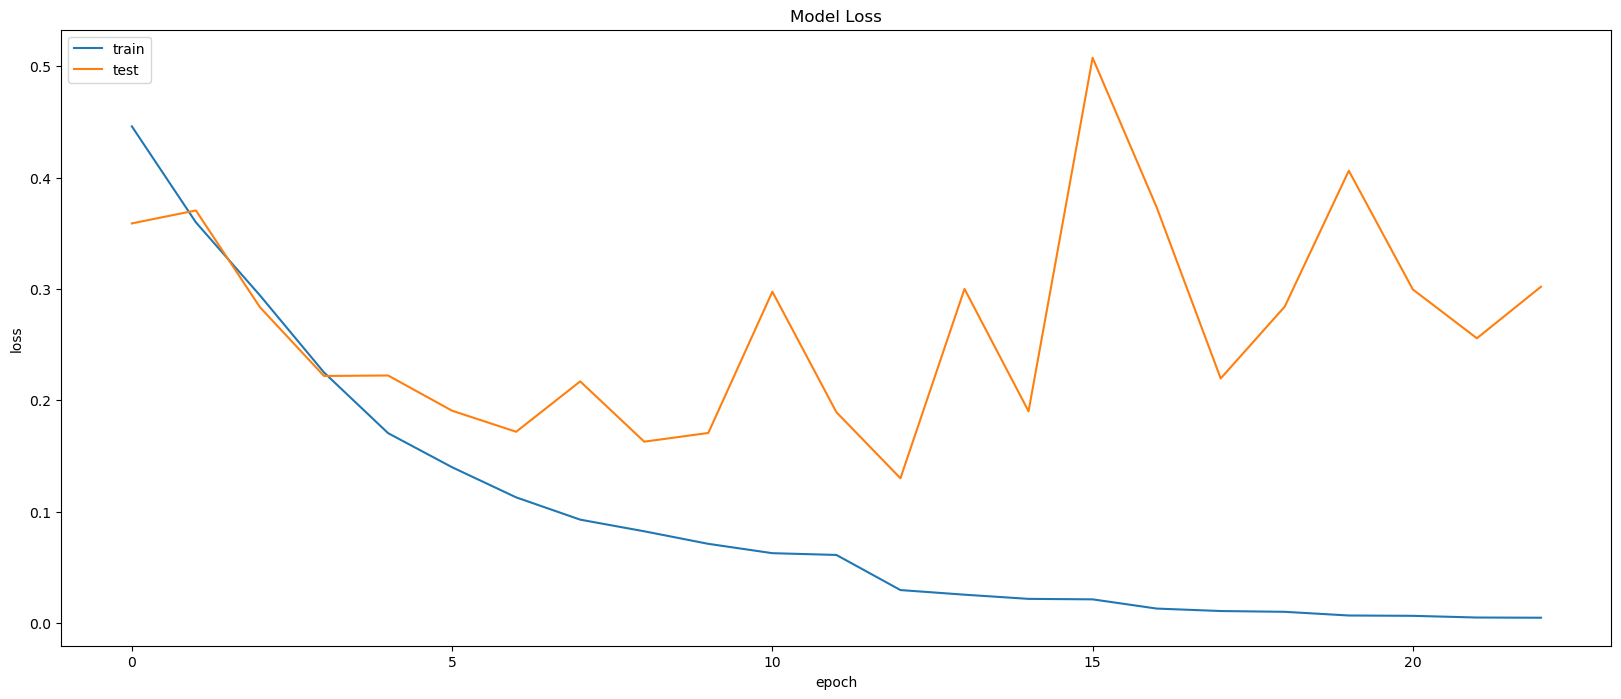

In [37]:
plt.figure(figsize=(20, 8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [38]:
from tensorflow.keras.models import save_model
model.save('breast_cancer_model.h5')